## Importing Data and Libraries

In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
df = pd.read_csv(url, header=None)

# Rename columns
columns = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
           'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 
           'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
           'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 
           'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
           'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
df.columns = columns

## Data Analysis

In [ ]:
# Convert diagnosis to binary variable
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Check for missing values
print('Missing Values:', df.isnull().sum().sum())

## Model training

In [ ]:
### Split into features and target
X = df.iloc[:, 2:]
y = df.iloc[:, 1]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Fit decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Fit random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Fit logistic regression model with LDA
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

lr_lda_model = LogisticRegression(random_state=42)
lr_lda_model.fit(X_train_lda, y_train)
y_pred_lr_lda = lr_lda_model.predict(X_test_lda)

# Fit logistic regression model with PCA
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lr_pca_model = LogisticRegression(random_state=42)
lr_pca_model.fit(X_train_pca, y_train)
y_pred_lr_pca = lr_pca_model.predict(X_test_pca)


## Model EValuation

Logistic Regression:
ROC AUC: 0.9828042328042329
Confusion Matrix:
[[106   2]
 [  1  62]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



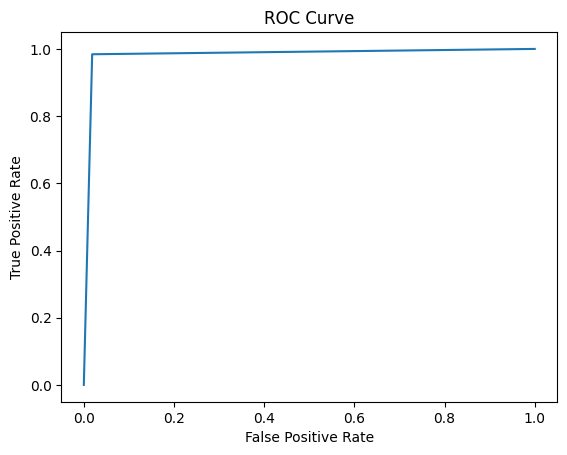

Decision Tree:
ROC AUC: 0.9437830687830688
Confusion Matrix:
[[101   7]
 [  3  60]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       108
           1       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



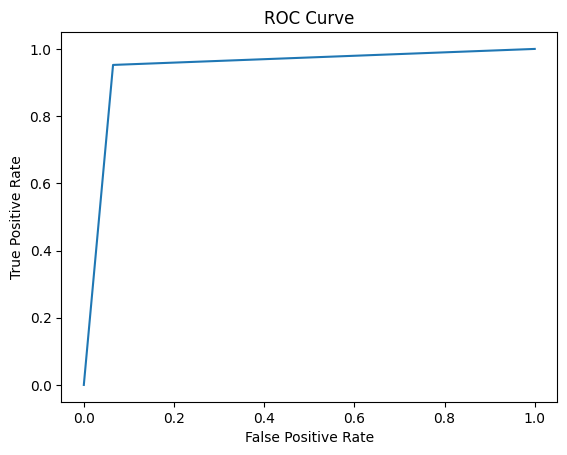

Random Forest:
ROC AUC: 0.9636243386243386
Confusion Matrix:
[[107   1]
 [  4  59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



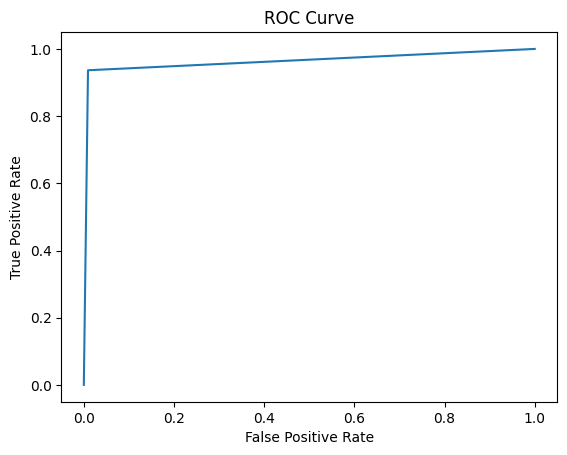

Logistic Regression with LDA:
ROC AUC: 0.9576719576719577
Confusion Matrix:
[[104   4]
 [  3  60]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



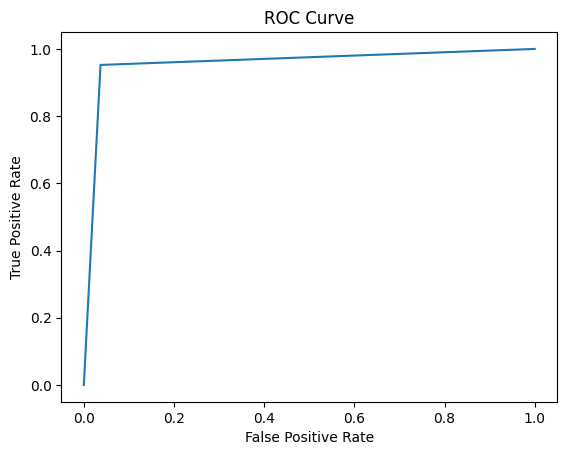

Logistic Regression with PCA:
ROC AUC: 0.9166666666666666
Confusion Matrix:
[[102   6]
 [  7  56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.90      0.89      0.90        63

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



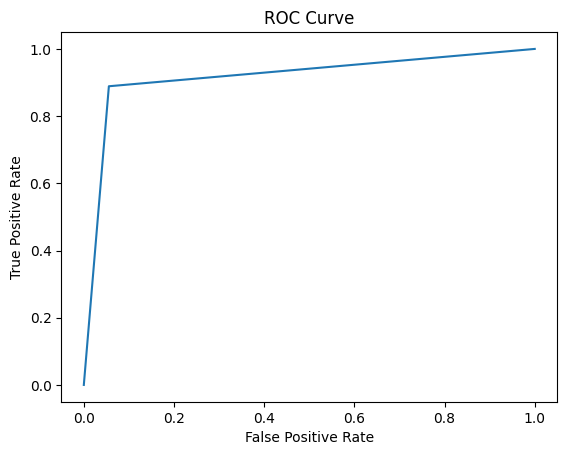

In [8]:

# Print performance metrics for each model
print('Logistic Regression:')
print('ROC AUC:', roc_auc_score(y_test, y_pred_lr))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_lr))
print('Classification Report:')
print(classification_report(y_test, y_pred_lr))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#decision tree model
print('Decision Tree:')
print('ROC AUC:', roc_auc_score(y_test, y_pred_dt))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dt))
print('Classification Report:')
print(classification_report(y_test, y_pred_dt))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#random forest model
print('Random Forest:')
print('ROC AUC:', roc_auc_score(y_test, y_pred_rf))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#logistic regression model with LDA
print('Logistic Regression with LDA:')
print('ROC AUC:', roc_auc_score(y_test, y_pred_lr_lda))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_lr_lda))
print('Classification Report:')
print(classification_report(y_test, y_pred_lr_lda))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr_lda)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#logistic regression model with PCA
print('Logistic Regression with PCA:')
print('ROC AUC:', roc_auc_score(y_test, y_pred_lr_pca))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_lr_pca))
print('Classification Report:')
print(classification_report(y_test, y_pred_lr_pca))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr_pca)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()